# Imports & file locations

In [1]:
%load_ext autoreload
%autoreload 2

import itertools
import os

import numpy as np
import scanpy 
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import anndata

# Olga's modules
import xspecies

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# From https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
# You can use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).
idx = pd.IndexSlice


anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.2
ptypro

## Matplotlibrc

In [2]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

Overwriting matplotlibrc


## Output, input directories

In [3]:
indir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/'

In [4]:

outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

GDRIVE_ANALYSIS_DIR = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

## Constants

In [5]:
groupby = "narrow_group"
species = "species"

tissue = "lung"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "differential-expression")

# Load data

In [6]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 518 ms, sys: 744 ms, total: 1.26 s
Wall time: 4.07 s


AnnData object with n_obs × n_vars = 83526 × 12972
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'narrow_group_dendrogram', 'narrow_group_dendrogram_colors', 'narrow_group_dendrogram_color', 'asdf', 'asdf_colors', 'dendrogram_group', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_subgroup_name', 'dendrogram_subgroup_color_hex', 'dendrogram_group_name_colors', 'dendrogram_subgroup_name_colors'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapi

## Make CrossSpeciesComparison object

In [7]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
# cross_species.plot_shared_cell_types()

compartment_narrow                                  species    
endothelial: artery cell                            Mouse             95
                                                    Mouse lemur      143
                                                    Human           1306
endothelial: capillary aerocyte cell                Mouse            512
                                                    Mouse lemur      900
                                                    Human           3712
endothelial: capillary cell                         Mouse           1743
                                                    Mouse lemur     1723
                                                    Human           5367
endothelial: lymphatic cell                         Mouse             40
                                                    Mouse lemur      258
                                                    Human            422
endothelial: vein cell                              Mouse   

extracting highly variable genes



------- group: endothelial: artery cell -------
number of cells: 1544


    finished (0:00:01)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3031


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


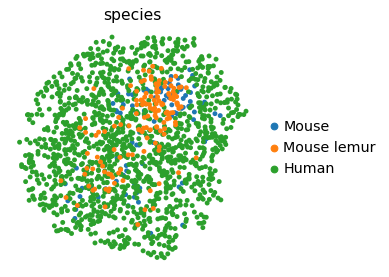

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.



------- group: endothelial: capillary aerocyte cell -------
number of cells: 5124


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2936


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


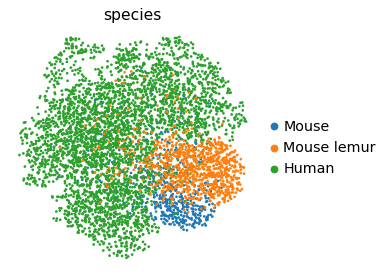

extracting highly variable genes



------- group: endothelial: capillary cell -------
number of cells: 8833


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3002


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


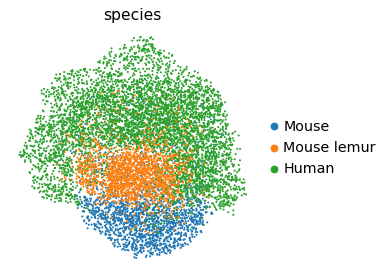

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: endothelial: lymphatic cell -------
number of cells: 720
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


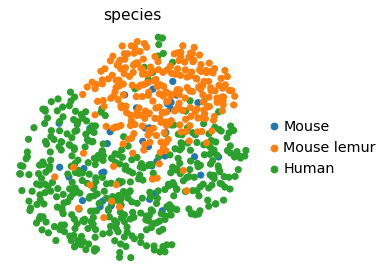

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: endothelial: vein cell -------
number of cells: 1408

 Number of highly variable genes: 3011


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


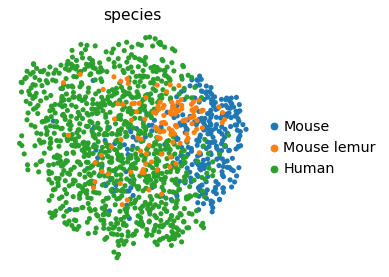

extracting highly variable genes



------- group: epithelial: alveolar epithelial cell type 2 -------
number of cells: 5255


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3018


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


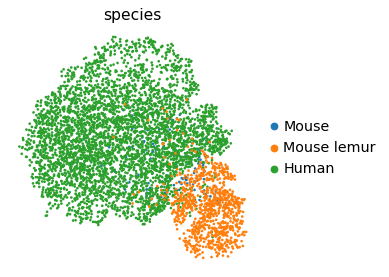

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: epithelial: ciliated cell -------
number of cells: 1370

 Number of highly variable genes: 3230


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


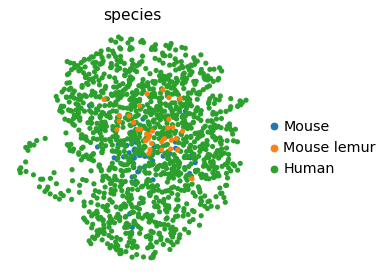

extracting highly variable genes



------- group: lymphoid: B cell -------
number of cells: 1925


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2880


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


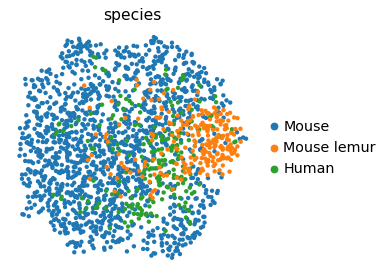

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes



------- group: lymphoid: CD4+ T cell -------
number of cells: 4089

 Number of highly variable genes: 2768


    with n_comps=50
    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


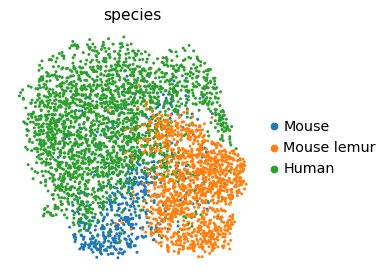

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes



------- group: lymphoid: CD8+ T cell -------
number of cells: 3184

 Number of highly variable genes: 2830


    with n_comps=50
    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


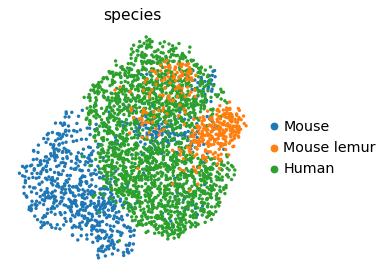

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: natural killer T cell -------
number of cells: 1220
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


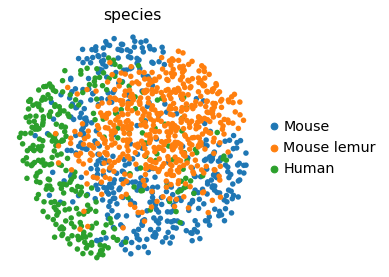

extracting highly variable genes



------- group: lymphoid: natural killer cell -------
number of cells: 7994


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2795


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


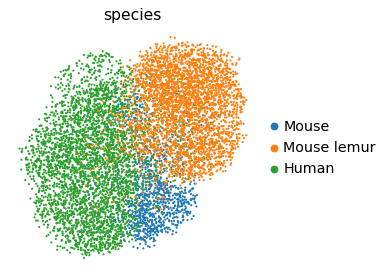

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: plasma cell -------
number of cells: 305
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


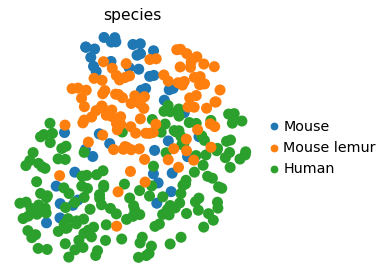

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: proliferating natural killer cell_T cell -------
number of cells: 817
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


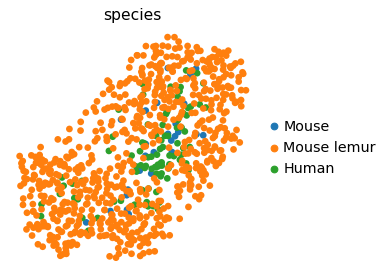

extracting highly variable genes



------- group: myeloid: alveolar macrophage -------
number of cells: 18704


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2710


    finished (0:00:05)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


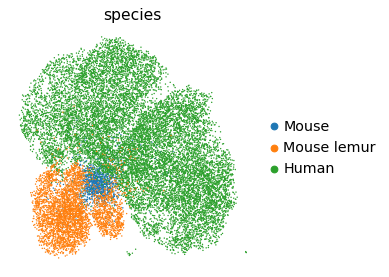

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: myeloid: conventional dendritic cell -------
number of cells: 722

 Number of highly variable genes: 2901


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


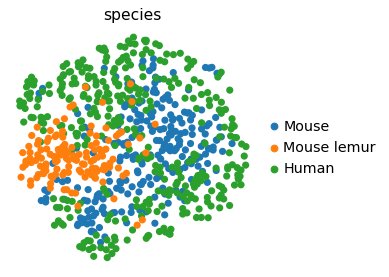

extracting highly variable genes



------- group: myeloid: monocyte -------
number of cells: 12457


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2677


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


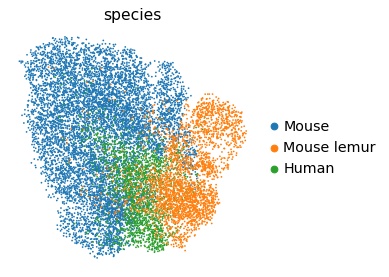

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing batch balanced neighbors



------- group: myeloid: plasmacytoid dendritic cell -------
number of cells: 245
Scanpy had an error when computing highly variable genes, using previous ones


	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


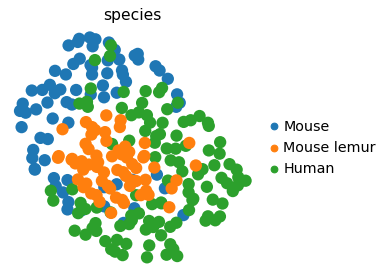

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: myeloid: proliferating alveolar macrophage -------
number of cells: 1225

 Number of highly variable genes: 2826


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


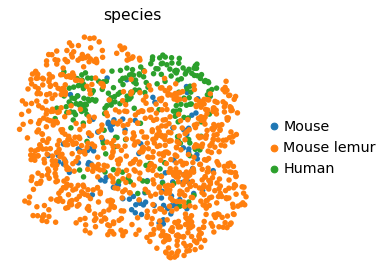

extracting highly variable genes



------- group: stromal: adventitial fibroblast -------
number of cells: 1361


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3143


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


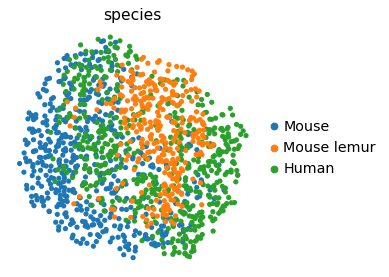

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.



------- group: stromal: alveolar fibroblast -------
number of cells: 3544


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3074


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


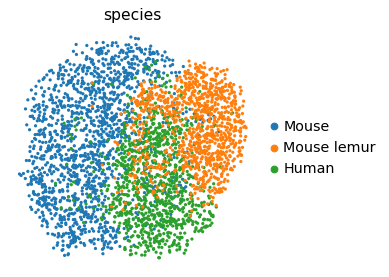

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: pericyte cell -------
number of cells: 1480

 Number of highly variable genes: 2978


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


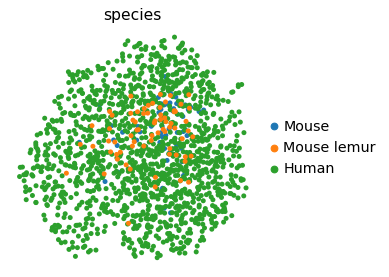


------- group: endothelial: artery cell -------
number of cells: 1544

------- group: endothelial: capillary aerocyte cell -------
number of cells: 5124

------- group: endothelial: capillary cell -------
number of cells: 8833

------- group: endothelial: lymphatic cell -------
number of cells: 720

------- group: endothelial: vein cell -------
number of cells: 1408

------- group: epithelial: alveolar epithelial cell type 2 -------
number of cells: 5255

------- group: epithelial: ciliated cell -------
number of cells: 1370

------- group: lymphoid: B cell -------
number of cells: 1925

------- group: lymphoid: CD4+ T cell -------
number of cells: 4089

------- group: lymphoid: CD8+ T cell -------
number of cells: 3184

------- group: lymphoid: natural killer T cell -------
number of cells: 1220

------- group: lymphoid: natural killer cell -------
number of cells: 7994

------- group: lymphoid: plasma cell -------
number of cells: 305

------- group: lymphoid: proliferating natural 

In [8]:
cross_species.make_mini_adatas(groupby='compartment_narrow')
cross_species.make_subset_adatas(do_pca_umap=False)

## Text about genes

> Comparison of cell types revealed lemurs possess lungs cell types found in human, but not mouse, such as the recently described fibromyocytes that express genes from both myofibroblasts (ASPN, FGF18, and COL1A2) [and also smooth muscle cells (ACTA2, CNN1, TAGLN) and that localize to airways in human]. Comparison of global expression patterns across 23 lung cell types shared across all three datasets, and spanning each major tissue compartment, revealed that 11 lemur cell types were more significantly similar to human than mouse (such as plasma cells, multiple dendritic populations, and both types of lung capillaries), 8 were equally similar (such as adventitial and alveolar fibroblasts and monocytes), and 4 were more similar to mouse than human (such as lymphatics and CD8+ T cells). Together, these results suggest lemur lungs are more similar to human and provide a roadmap for which cell types and physiological processes require primate models for future study, and those that do not.

> Analyzing the specific genes with shared expression in lemur and human cells, but not in mice, that helped drive the global similarity scores revealed they could influence each cell type’s canonical molecular function. This includes alveolar macrophage’s role in immune modulation through primate-specific expression of complement genes (C1QA,C1QB, CFD) and genes responsive to pathogens or injury (OSCAR, IL4I1, MME), ciliated cells role in airway clearance through expression of modulators of ciliary formation and function (SPATA4, CIB1, WDR38, WDR54), capillary aerocyte function in gas-exchange through expression of an enzyme which synthesizes (ACE) and receptor which responds to (VIPR1) vasoactive hormones, and pericytes in maintaining capillary integrity through expression of modulators of angiogenesis (NDRG1, RGS5) and wound healing (WFDC1). Notably, these four examples also come from cells across the four major lung tissue compartments and provide specific molecular targets for future functional studies.


### Primate-enriched genes from binarized analyses, minus dissocaition genes

gene subset #1

------- group: myeloid: alveolar macrophage -------


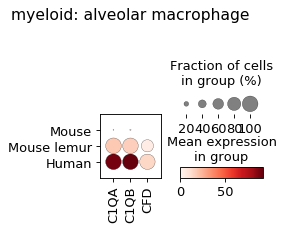

In [9]:
gene_names = "C1QA", "C1QB", "CFD"

celltype_to_genes = {
    "myeloid: alveolar macrophage": ["C1QA", "C1QB", "CFD", "OSCAR", 'IL4I1', 'MME'],
    "epithelial: ciliated cell": ["SPATA4", 'CIB1', 'WDR38', "WDR54"],
    "endothelial: capillary aerocyte cell": ["ACE", "VIPR1"],
    "stromal: pericyte cell": "N"
}

cross_species.dotplots(gene_names, select_group="myeloid: alveolar macrophage")

gene subset #1

------- group: lymphoid: B cell -------


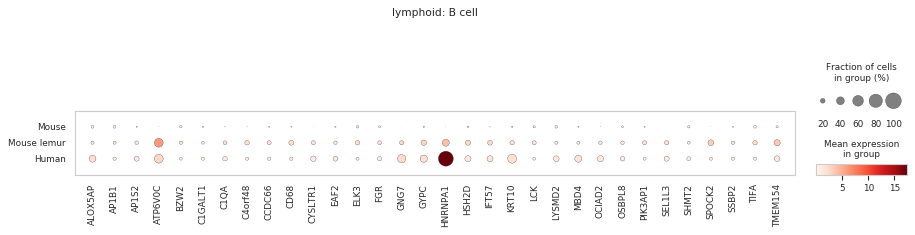

gene subset #2

------- group: lymphoid: B cell -------


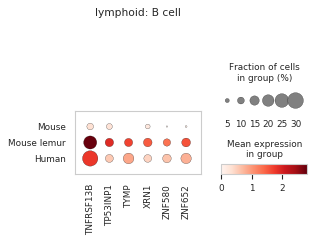

gene subset #1

------- group: lymphoid: CD4+ T cell -------


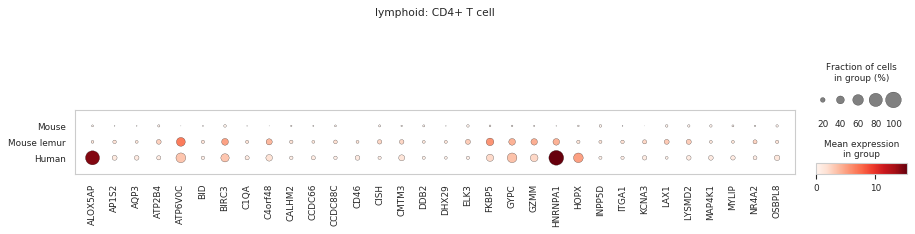

gene subset #2

------- group: lymphoid: CD4+ T cell -------


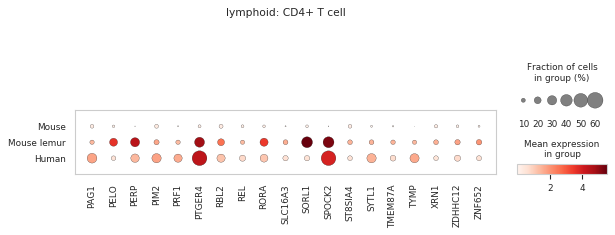

gene subset #1

------- group: lymphoid: CD8+ T cell -------


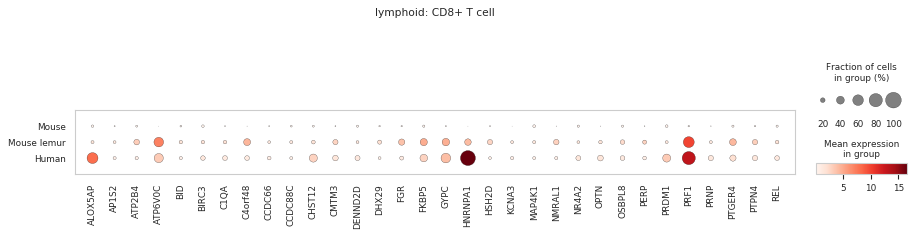

gene subset #2

------- group: lymphoid: CD8+ T cell -------


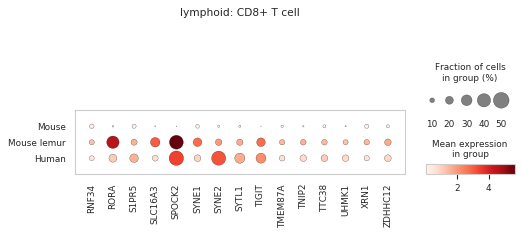

gene subset #1

------- group: stromal: adventitial fibroblast -------


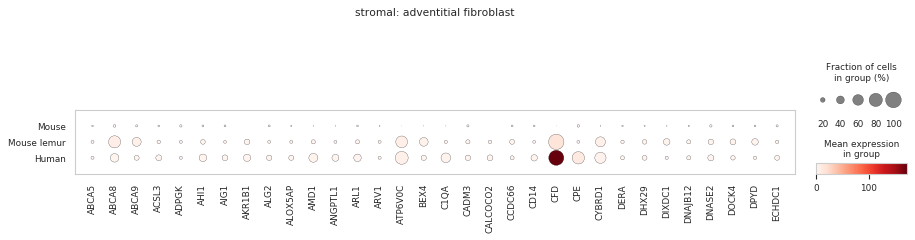

gene subset #2

------- group: stromal: adventitial fibroblast -------


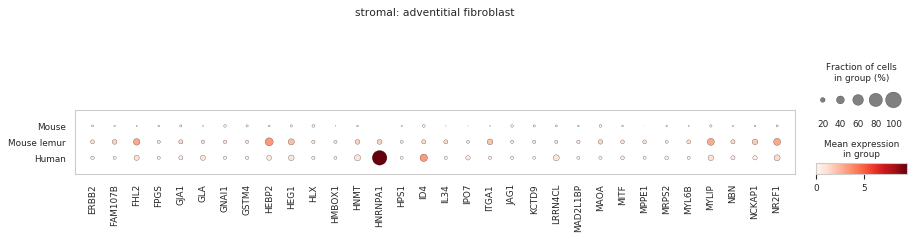

gene subset #3

------- group: stromal: adventitial fibroblast -------


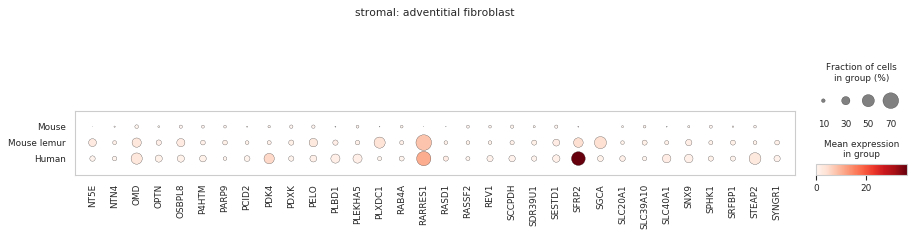

gene subset #4

------- group: stromal: adventitial fibroblast -------


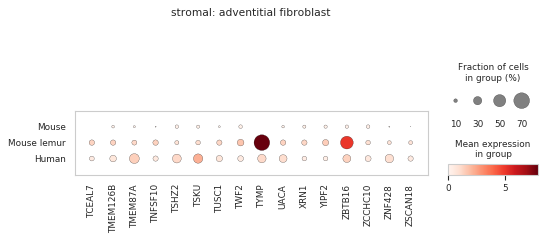

gene subset #1

------- group: epithelial: alveolar epithelial cell type 2 -------


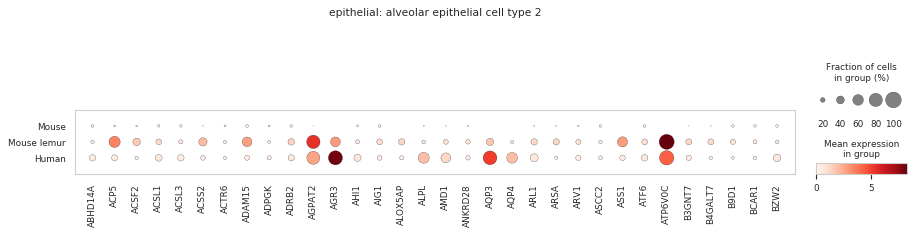

gene subset #2

------- group: epithelial: alveolar epithelial cell type 2 -------


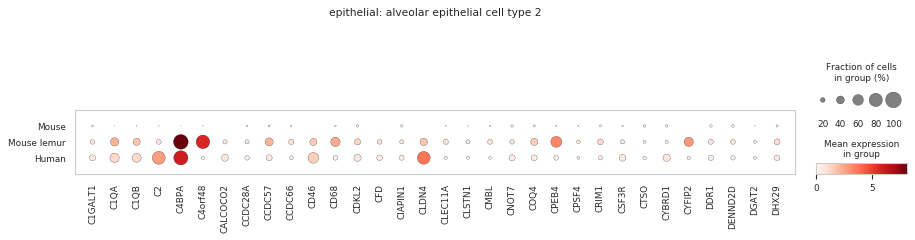

gene subset #3

------- group: epithelial: alveolar epithelial cell type 2 -------


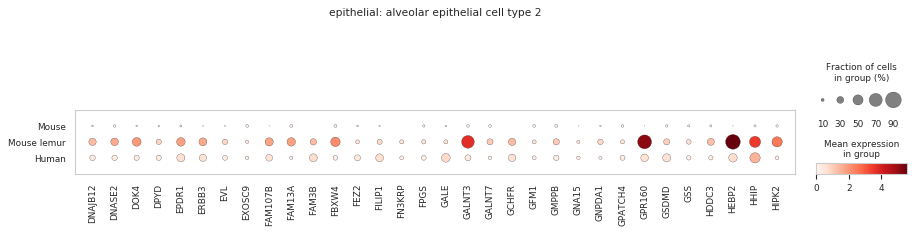

gene subset #4

------- group: epithelial: alveolar epithelial cell type 2 -------


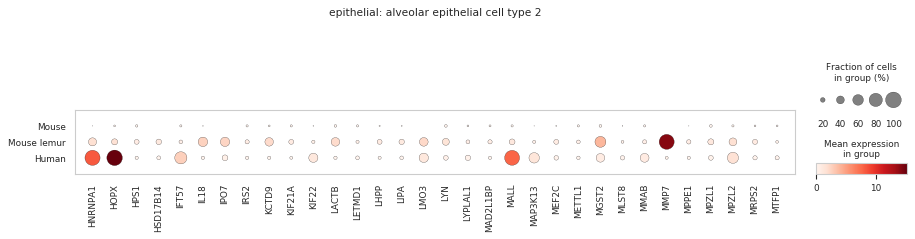

gene subset #5

------- group: epithelial: alveolar epithelial cell type 2 -------


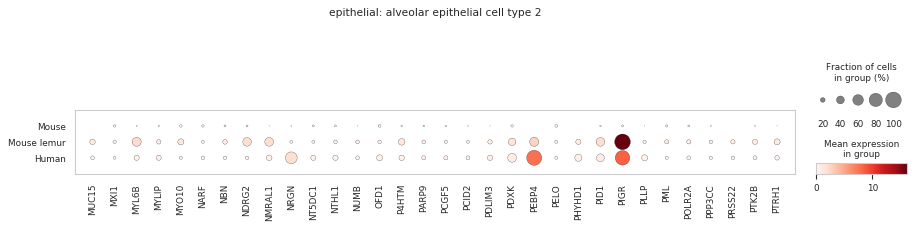

gene subset #6

------- group: epithelial: alveolar epithelial cell type 2 -------


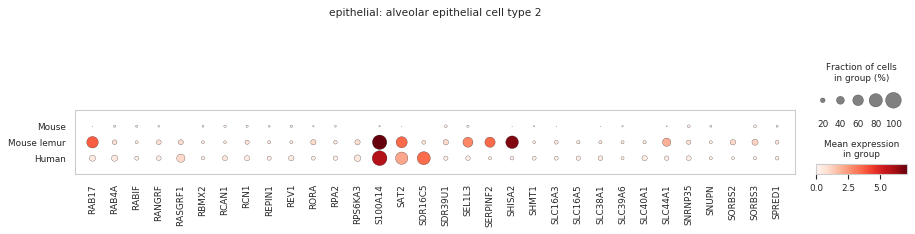

gene subset #7

------- group: epithelial: alveolar epithelial cell type 2 -------


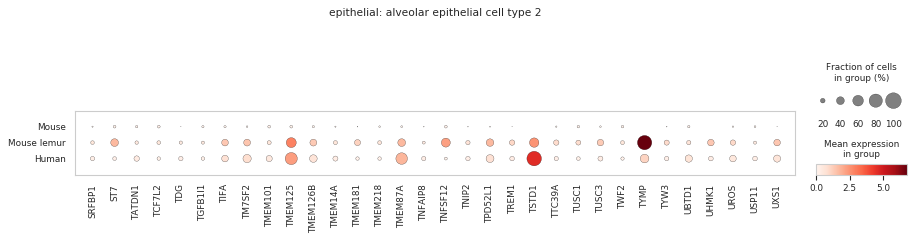

gene subset #8

------- group: epithelial: alveolar epithelial cell type 2 -------


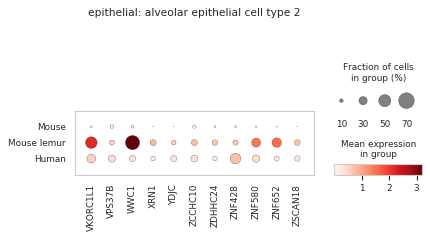

gene subset #1

------- group: stromal: alveolar fibroblast -------


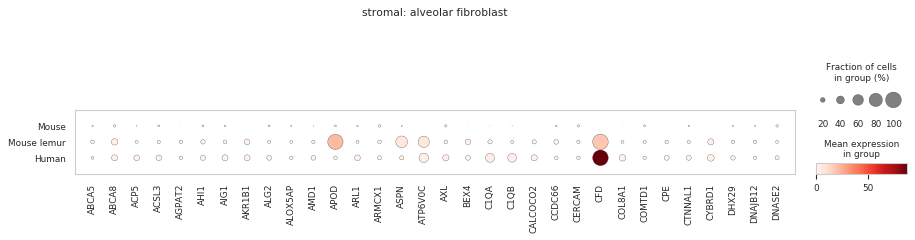

gene subset #2

------- group: stromal: alveolar fibroblast -------


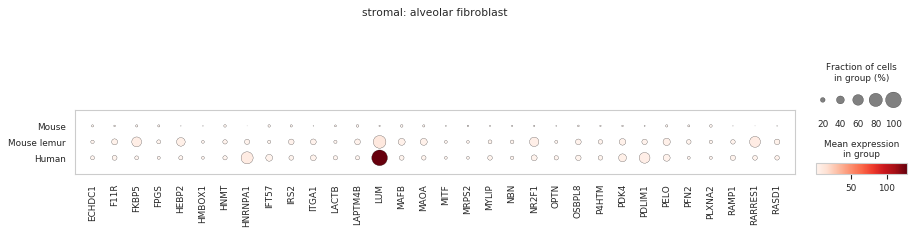

gene subset #3

------- group: stromal: alveolar fibroblast -------


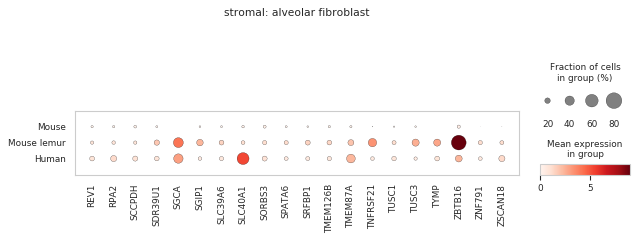

gene subset #1

------- group: myeloid: alveolar macrophage -------


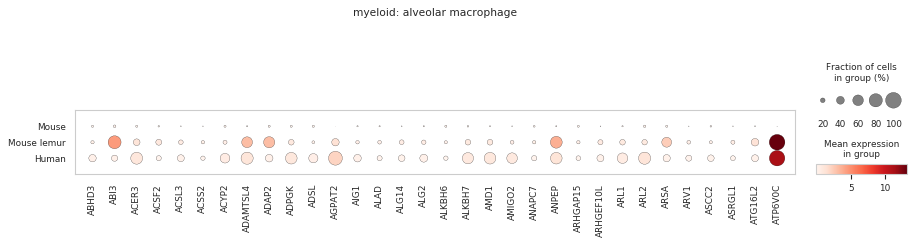

gene subset #2

------- group: myeloid: alveolar macrophage -------


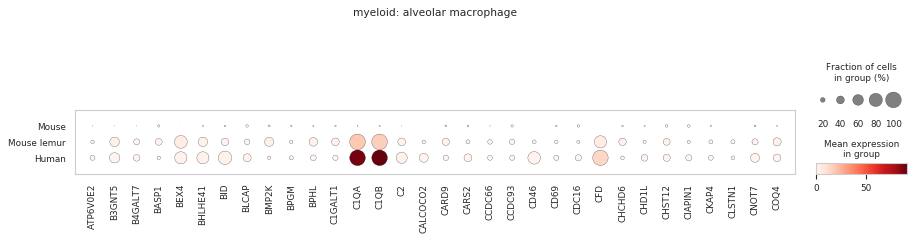

gene subset #3

------- group: myeloid: alveolar macrophage -------


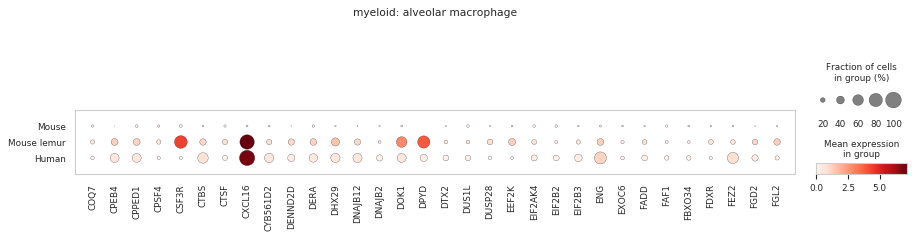

gene subset #4

------- group: myeloid: alveolar macrophage -------


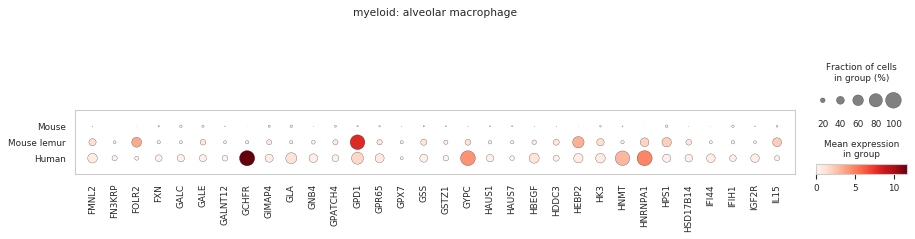

gene subset #5

------- group: myeloid: alveolar macrophage -------


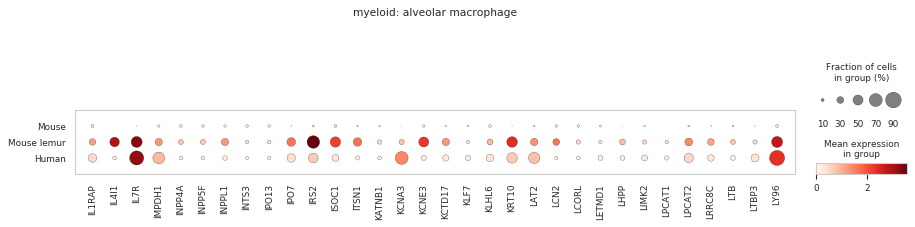

gene subset #6

------- group: myeloid: alveolar macrophage -------


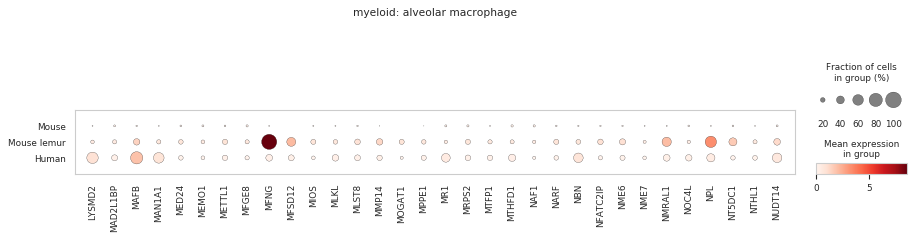

gene subset #7

------- group: myeloid: alveolar macrophage -------


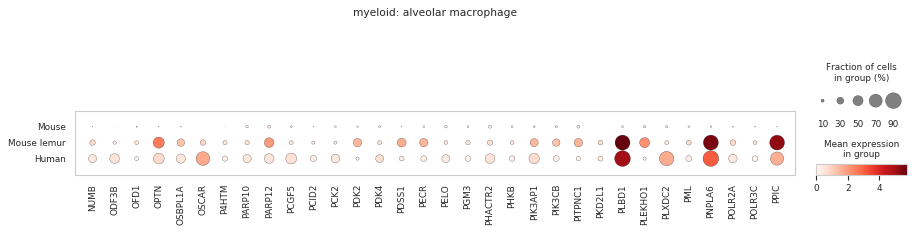

gene subset #8

------- group: myeloid: alveolar macrophage -------


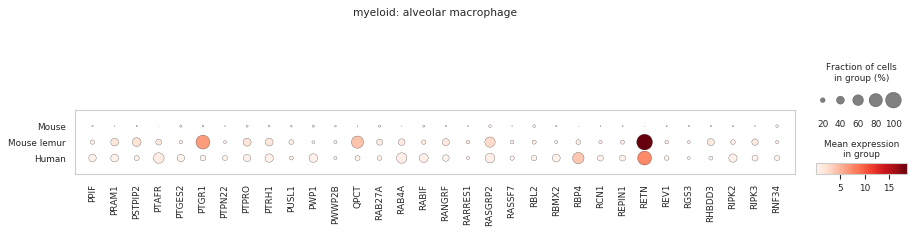

gene subset #9

------- group: myeloid: alveolar macrophage -------


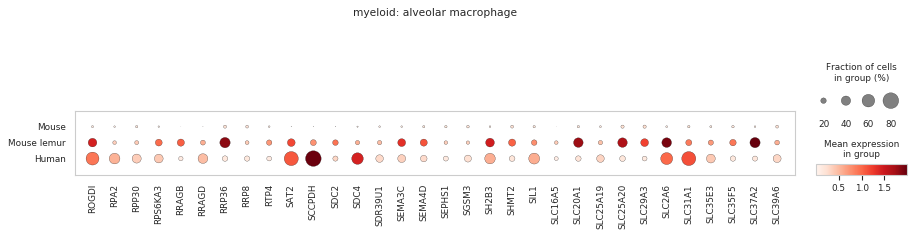

gene subset #10

------- group: myeloid: alveolar macrophage -------


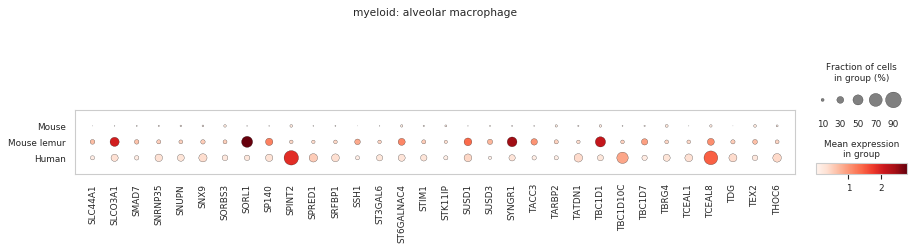

gene subset #11

------- group: myeloid: alveolar macrophage -------


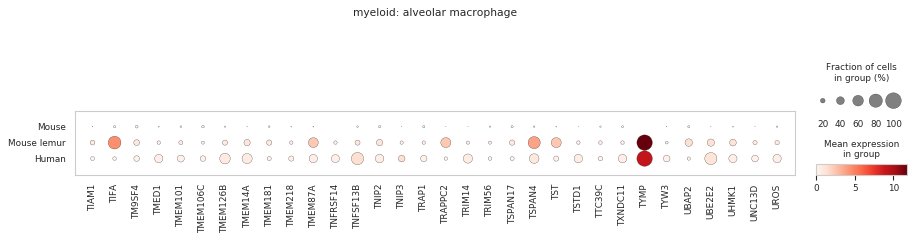

gene subset #12

------- group: myeloid: alveolar macrophage -------


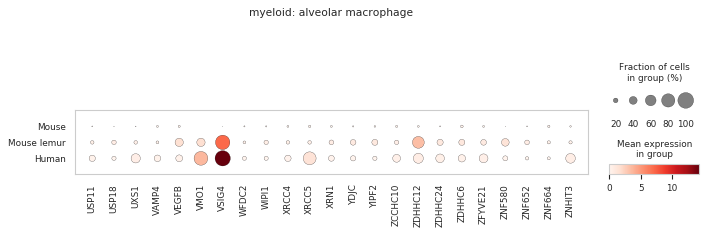

gene subset #1

------- group: endothelial: artery cell -------


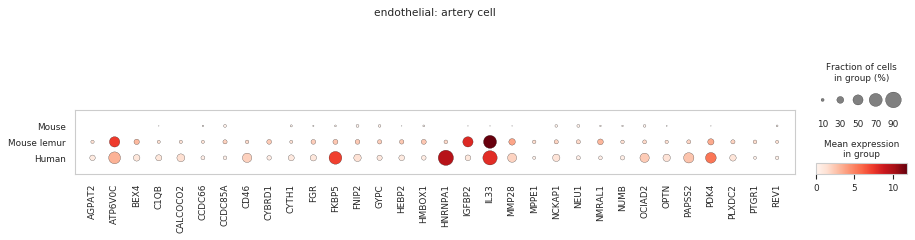

gene subset #2

------- group: endothelial: artery cell -------


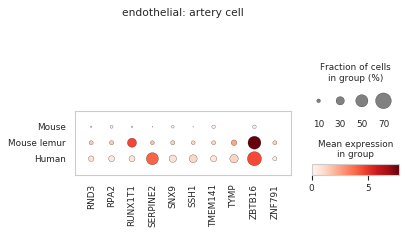

gene subset #1

------- group: endothelial: capillary aerocyte cell -------


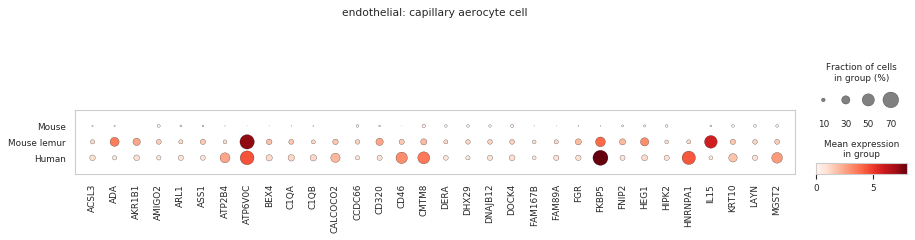

gene subset #2

------- group: endothelial: capillary aerocyte cell -------


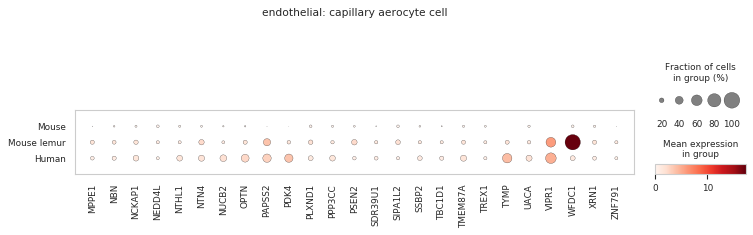

gene subset #1

------- group: endothelial: capillary cell -------


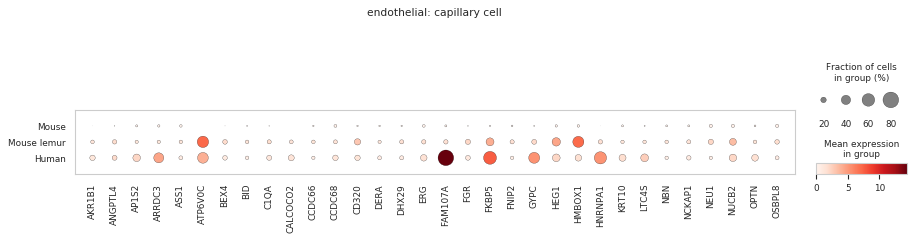

gene subset #2

------- group: endothelial: capillary cell -------


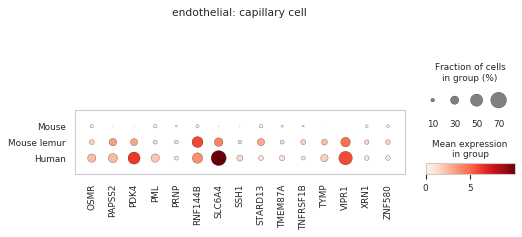

gene subset #1

------- group: epithelial: ciliated cell -------


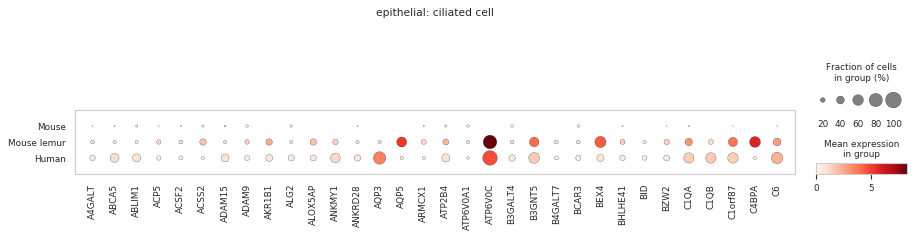

gene subset #2

------- group: epithelial: ciliated cell -------


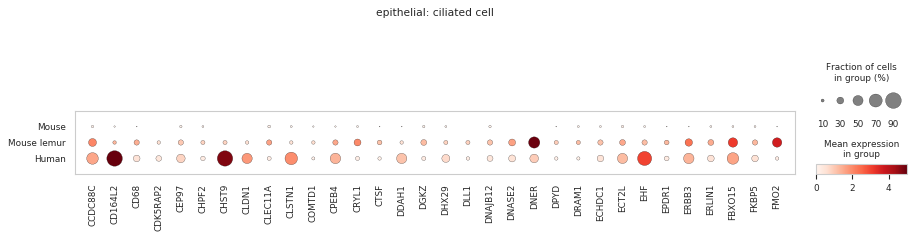

gene subset #3

------- group: epithelial: ciliated cell -------


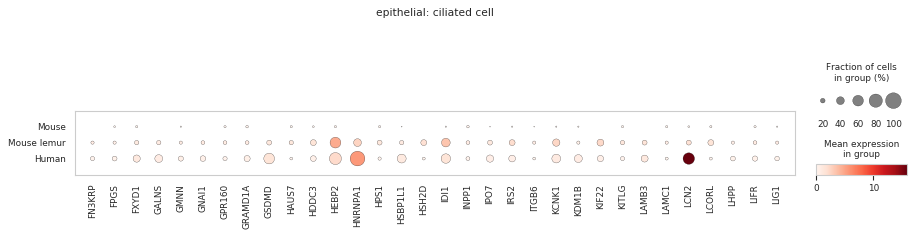

gene subset #4

------- group: epithelial: ciliated cell -------


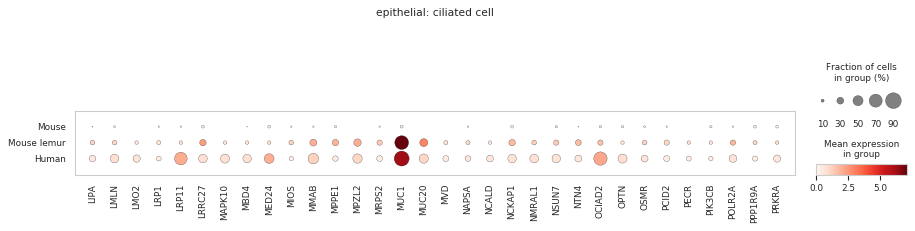

gene subset #5

------- group: epithelial: ciliated cell -------


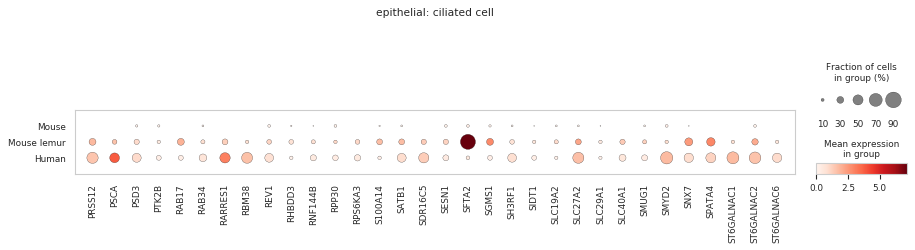

gene subset #6

------- group: epithelial: ciliated cell -------


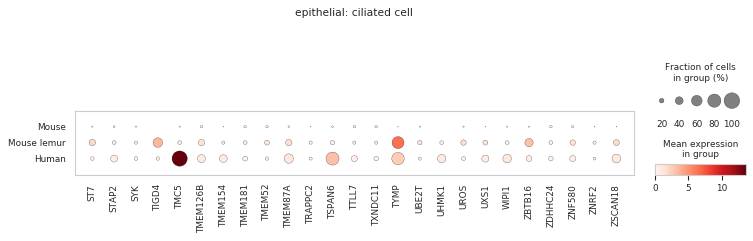

gene subset #1

------- group: myeloid: conventional dendritic cell -------


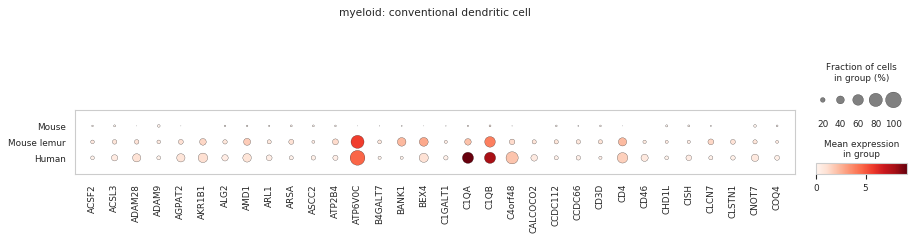

gene subset #2

------- group: myeloid: conventional dendritic cell -------


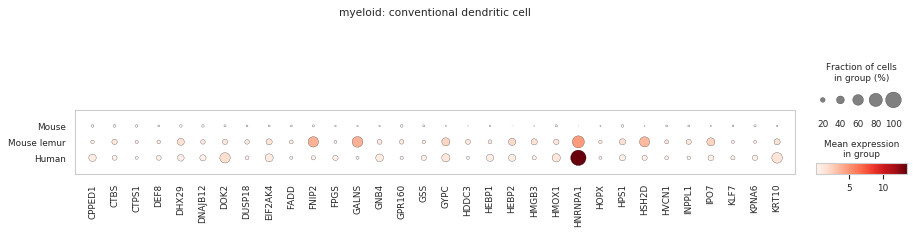

gene subset #3

------- group: myeloid: conventional dendritic cell -------


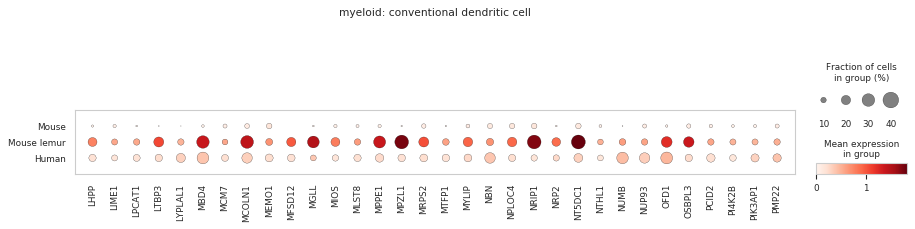

gene subset #4

------- group: myeloid: conventional dendritic cell -------


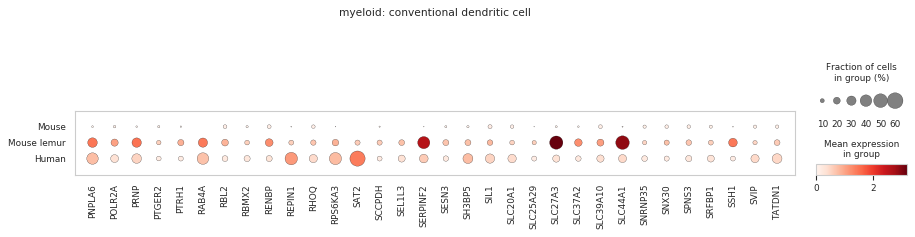

gene subset #5

------- group: myeloid: conventional dendritic cell -------


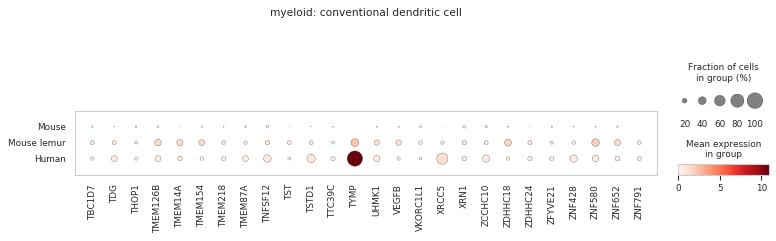

gene subset #1

------- group: endothelial: lymphatic cell -------


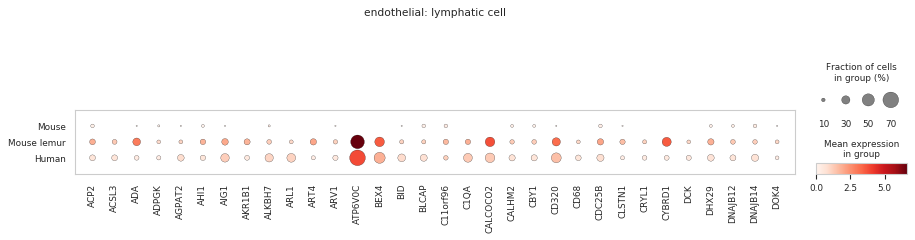

gene subset #2

------- group: endothelial: lymphatic cell -------


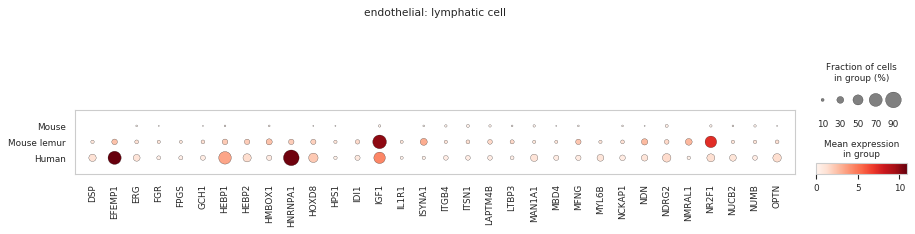

gene subset #3

------- group: endothelial: lymphatic cell -------


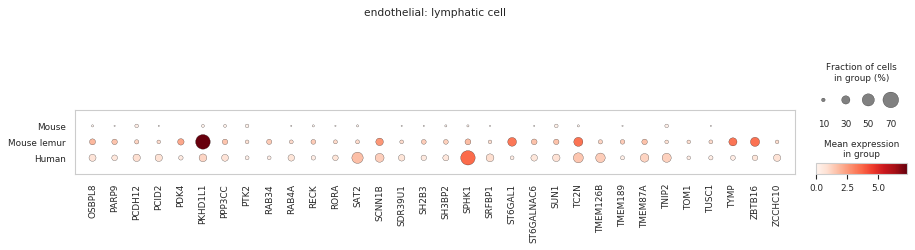

gene subset #4

------- group: endothelial: lymphatic cell -------


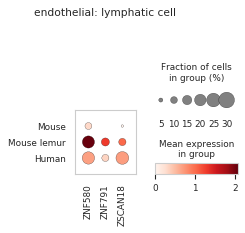

gene subset #1

------- group: myeloid: monocyte -------


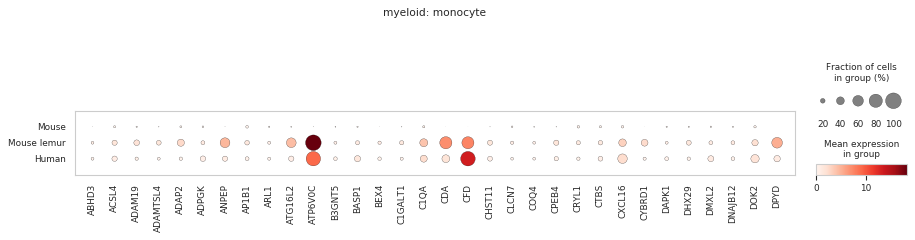

gene subset #2

------- group: myeloid: monocyte -------


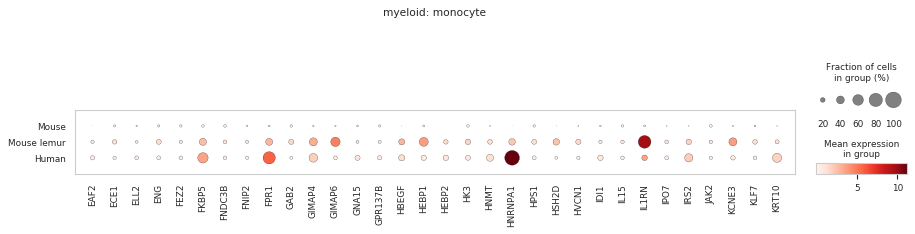

gene subset #3

------- group: myeloid: monocyte -------


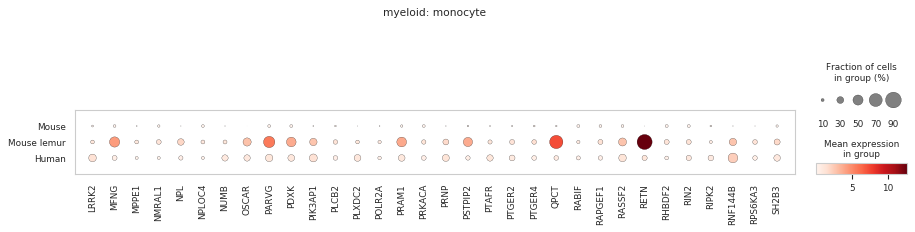

gene subset #4

------- group: myeloid: monocyte -------


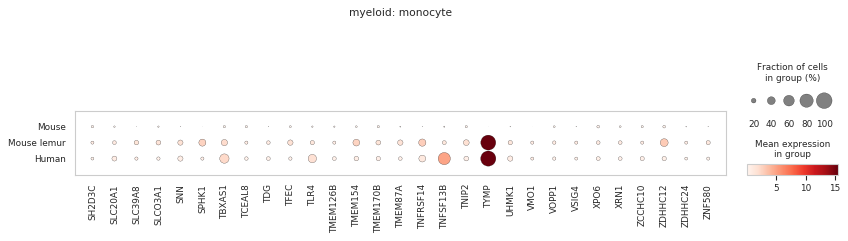

gene subset #1

------- group: stromal: myofibroblast cell -------


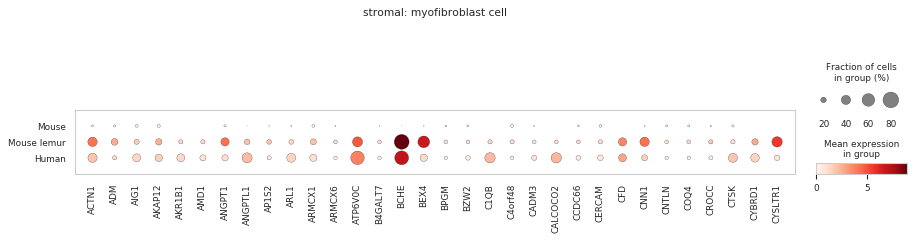

gene subset #2

------- group: stromal: myofibroblast cell -------


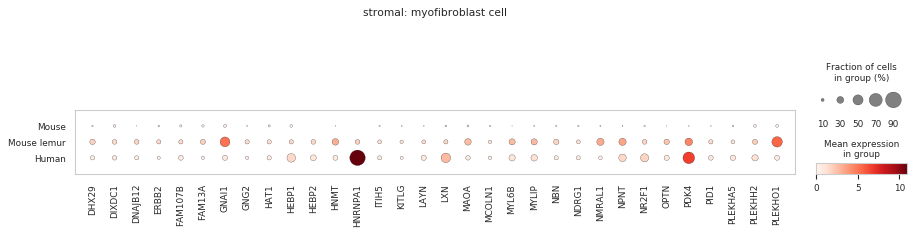

gene subset #3

------- group: stromal: myofibroblast cell -------


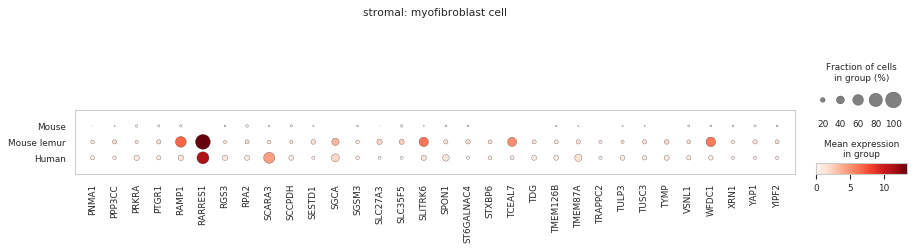

gene subset #4

------- group: stromal: myofibroblast cell -------


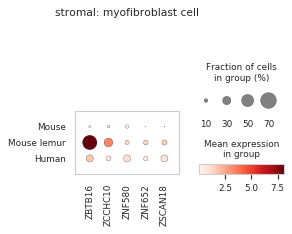

gene subset #1

------- group: lymphoid: natural killer T cell -------


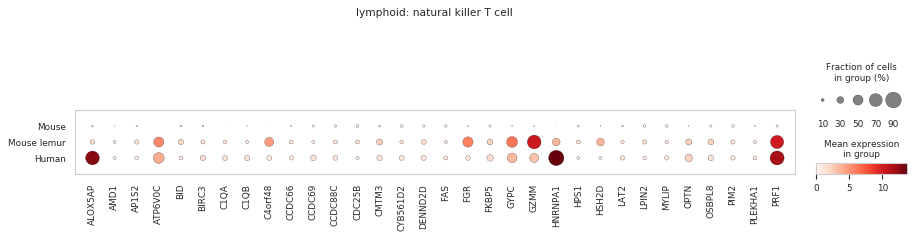

gene subset #2

------- group: lymphoid: natural killer T cell -------


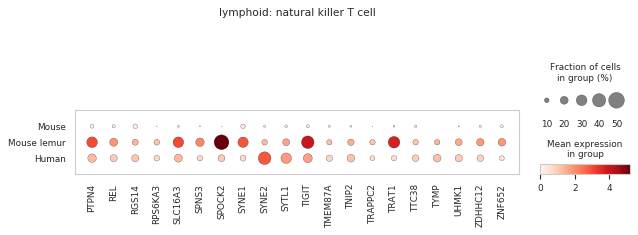

gene subset #1

------- group: lymphoid: natural killer cell -------


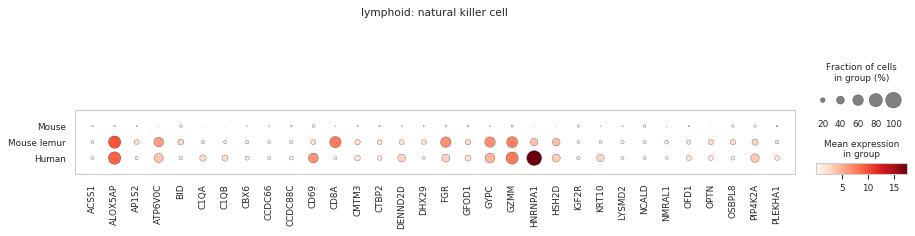

gene subset #2

------- group: lymphoid: natural killer cell -------


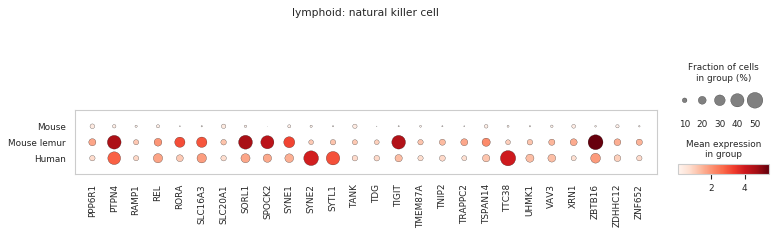

gene subset #1

------- group: stromal: pericyte cell -------


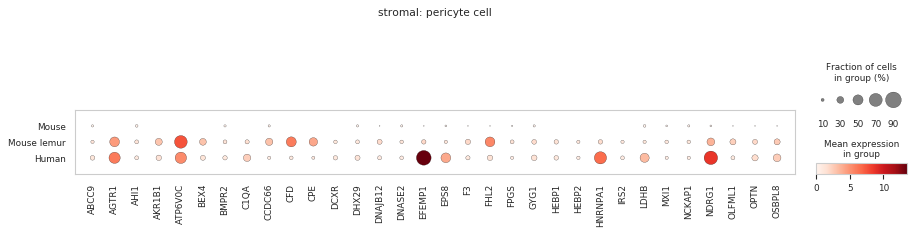

gene subset #2

------- group: stromal: pericyte cell -------


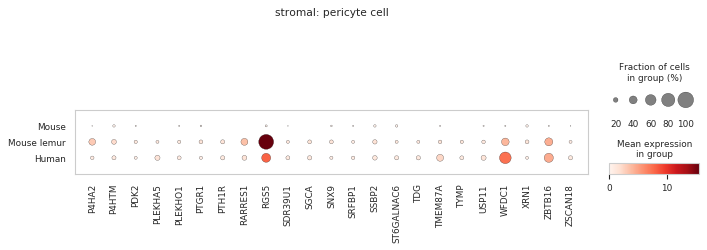

gene subset #1

------- group: lymphoid: plasma cell -------


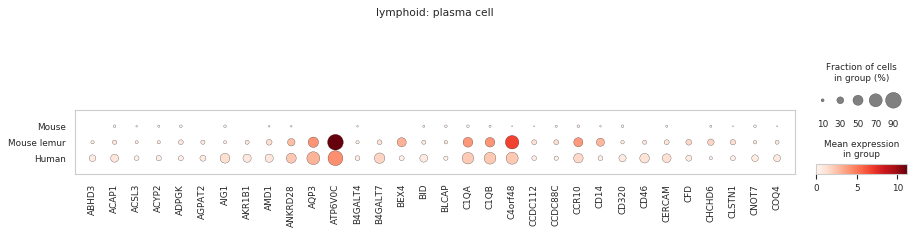

gene subset #2

------- group: lymphoid: plasma cell -------


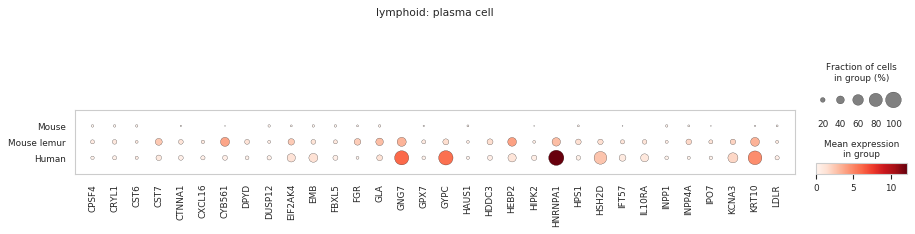

gene subset #3

------- group: lymphoid: plasma cell -------


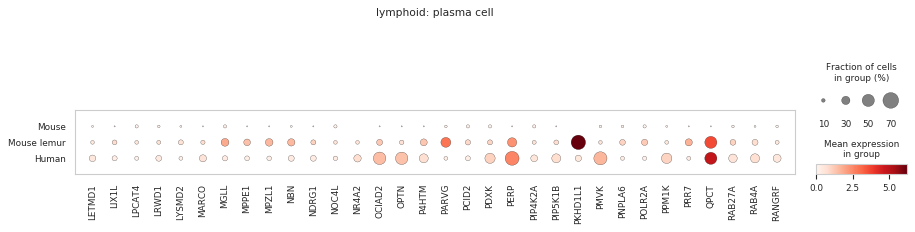

gene subset #4

------- group: lymphoid: plasma cell -------


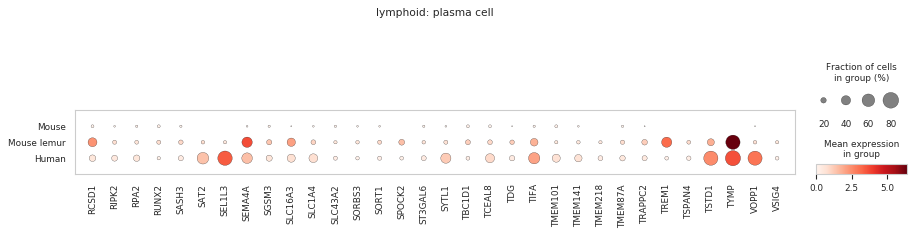

gene subset #5

------- group: lymphoid: plasma cell -------


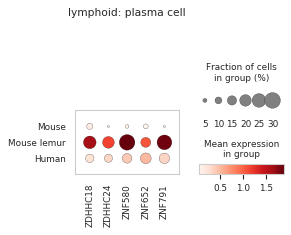

gene subset #1

------- group: myeloid: plasmacytoid dendritic cell -------


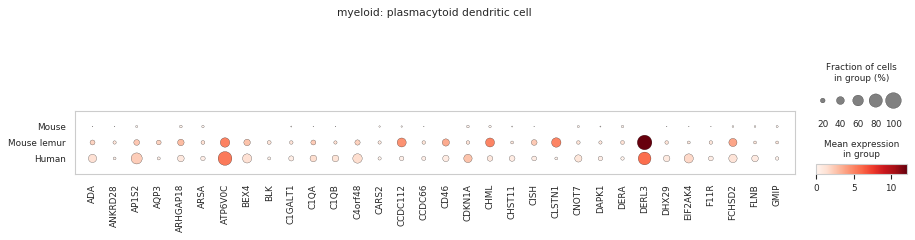

gene subset #2

------- group: myeloid: plasmacytoid dendritic cell -------


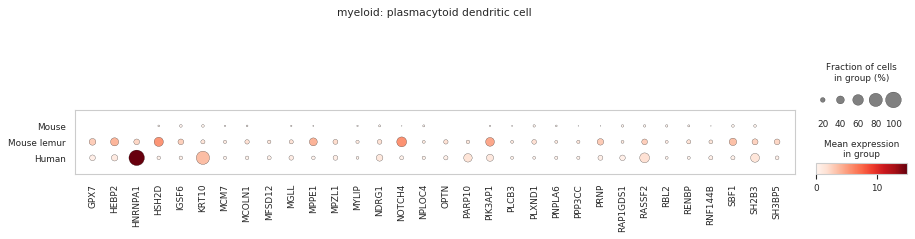

gene subset #3

------- group: myeloid: plasmacytoid dendritic cell -------


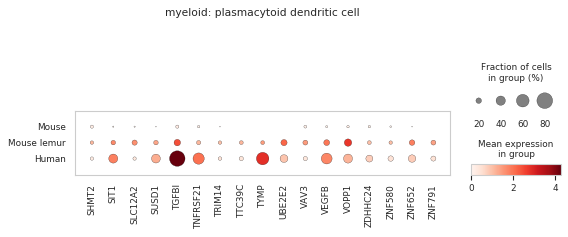

gene subset #1

------- group: myeloid: proliferating alveolar macrophage -------


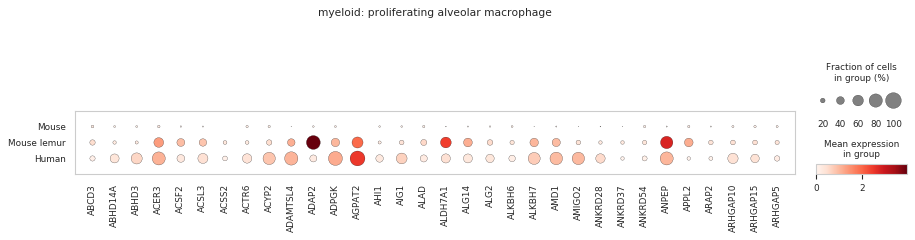

gene subset #2

------- group: myeloid: proliferating alveolar macrophage -------


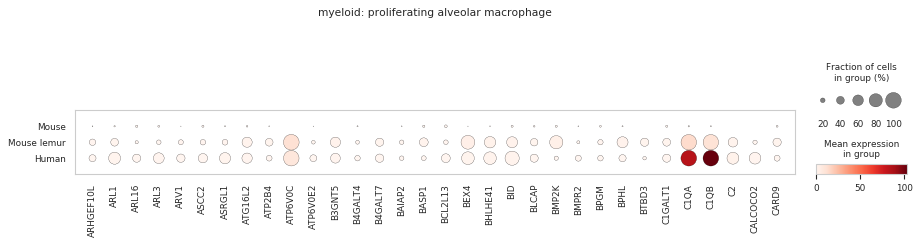

gene subset #3

------- group: myeloid: proliferating alveolar macrophage -------


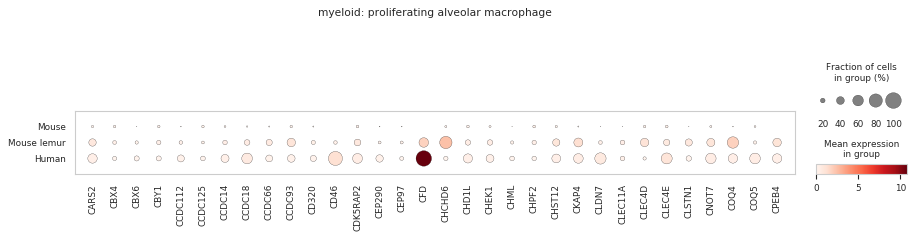

gene subset #4

------- group: myeloid: proliferating alveolar macrophage -------


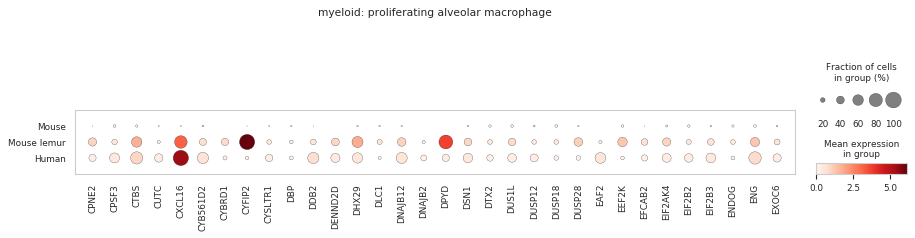

gene subset #5

------- group: myeloid: proliferating alveolar macrophage -------


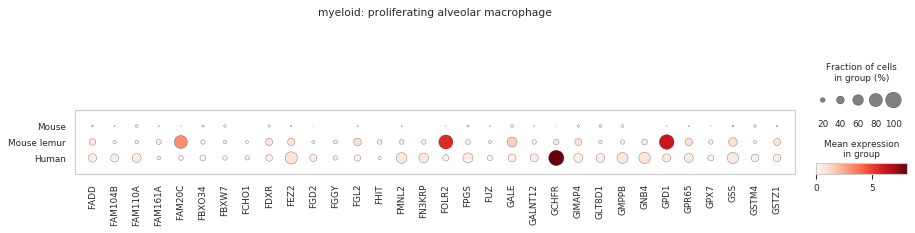

gene subset #6

------- group: myeloid: proliferating alveolar macrophage -------


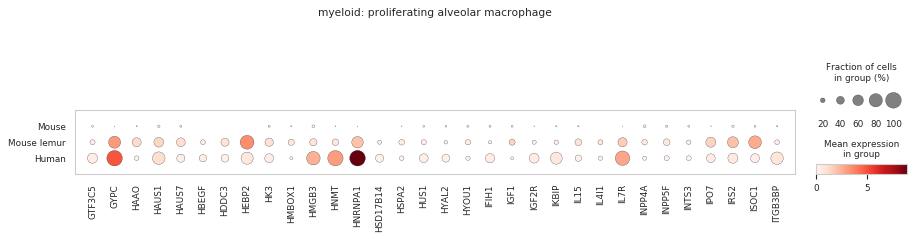

gene subset #7

------- group: myeloid: proliferating alveolar macrophage -------


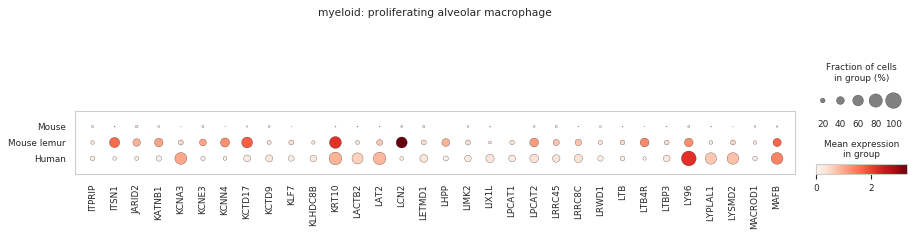

gene subset #8

------- group: myeloid: proliferating alveolar macrophage -------


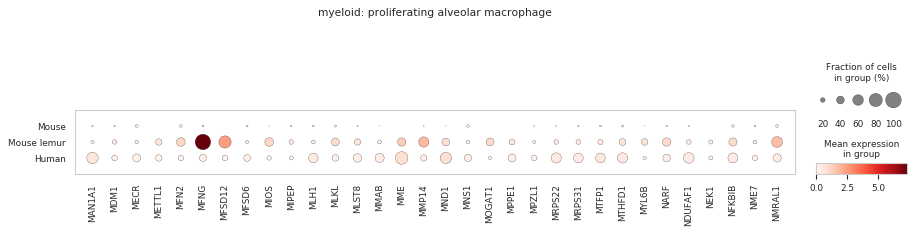

gene subset #9

------- group: myeloid: proliferating alveolar macrophage -------


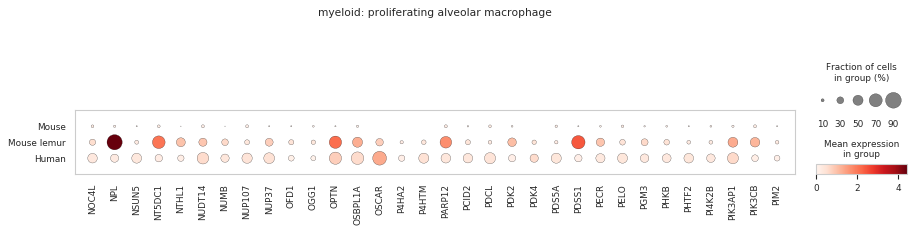

gene subset #10

------- group: myeloid: proliferating alveolar macrophage -------


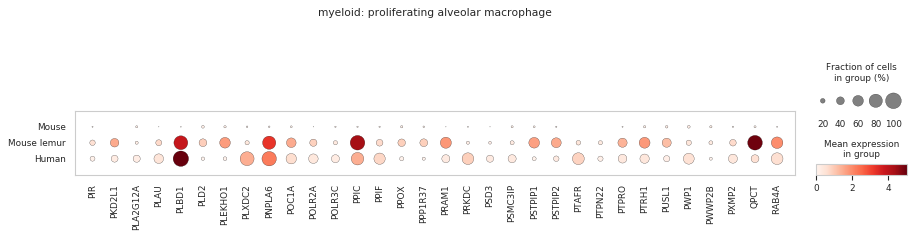

gene subset #11

------- group: myeloid: proliferating alveolar macrophage -------


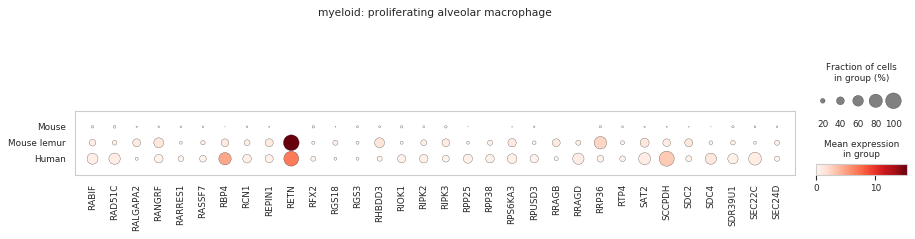

gene subset #12

------- group: myeloid: proliferating alveolar macrophage -------


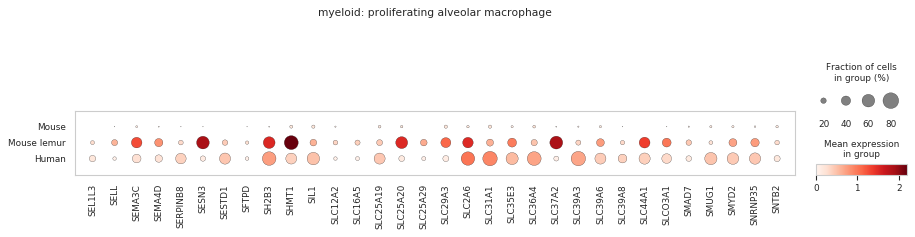

gene subset #13

------- group: myeloid: proliferating alveolar macrophage -------


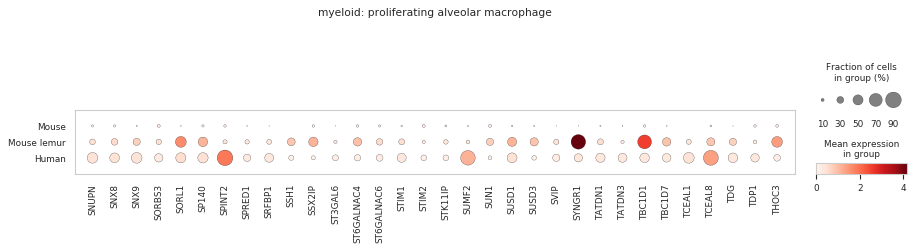

gene subset #14

------- group: myeloid: proliferating alveolar macrophage -------


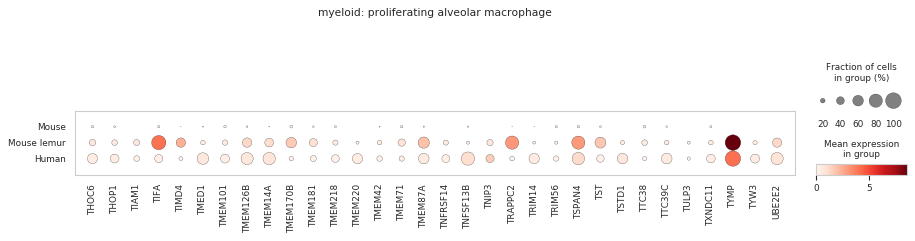

gene subset #15

------- group: myeloid: proliferating alveolar macrophage -------


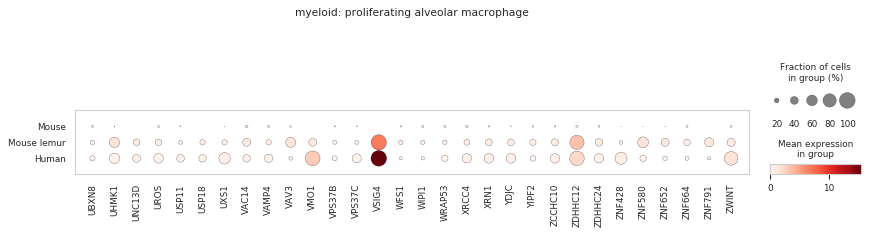

gene subset #1

------- group: lymphoid: proliferating natural killer cell_T cell -------


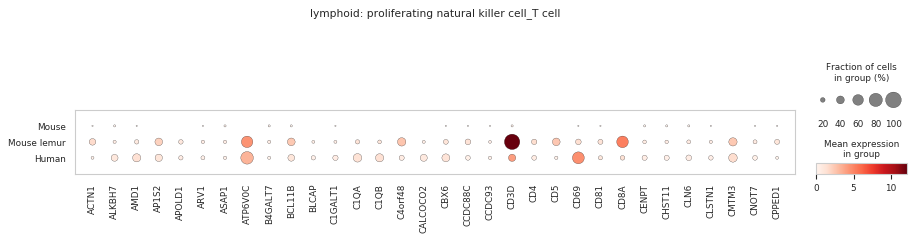

gene subset #2

------- group: lymphoid: proliferating natural killer cell_T cell -------


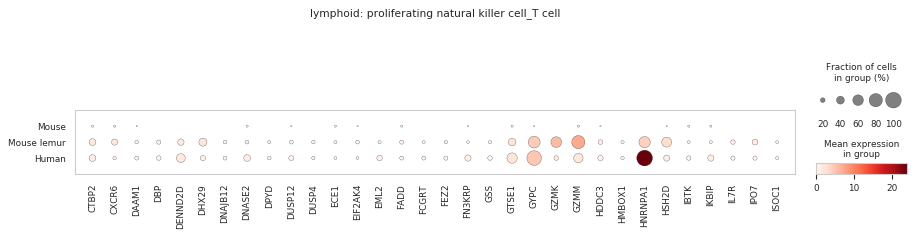

gene subset #3

------- group: lymphoid: proliferating natural killer cell_T cell -------


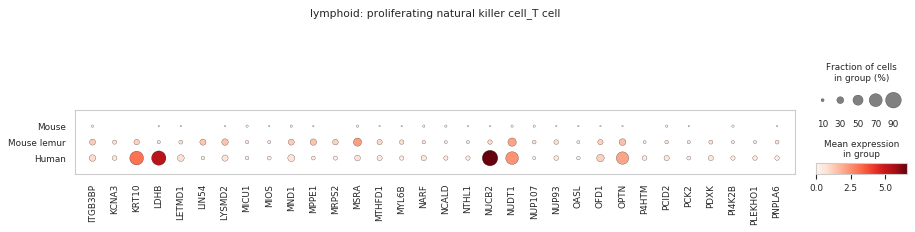

gene subset #4

------- group: lymphoid: proliferating natural killer cell_T cell -------


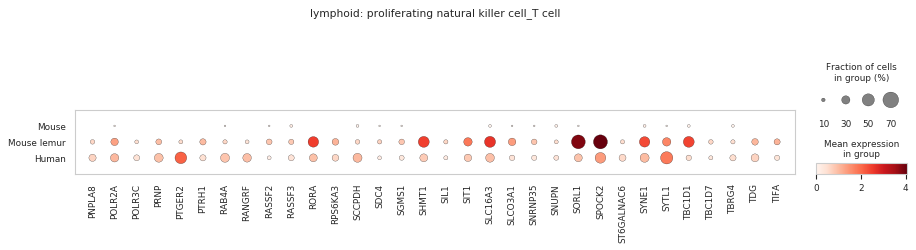

gene subset #5

------- group: lymphoid: proliferating natural killer cell_T cell -------


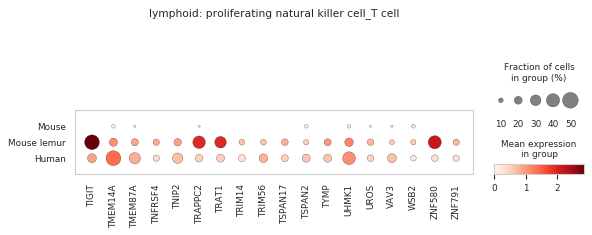

gene subset #1

------- group: endothelial: vein cell -------


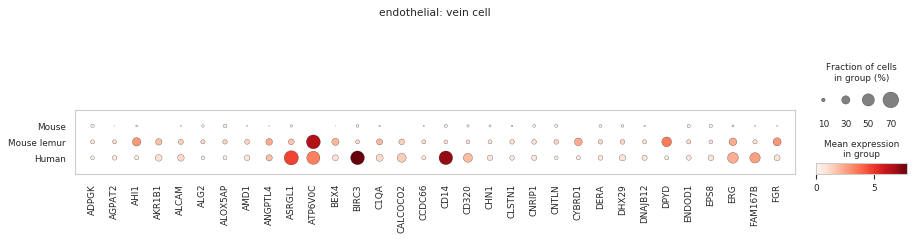

gene subset #2

------- group: endothelial: vein cell -------


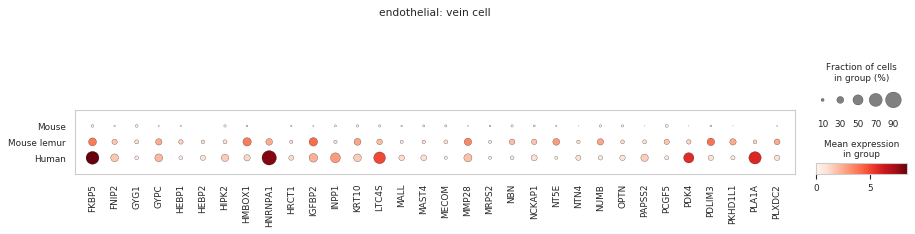

gene subset #3

------- group: endothelial: vein cell -------


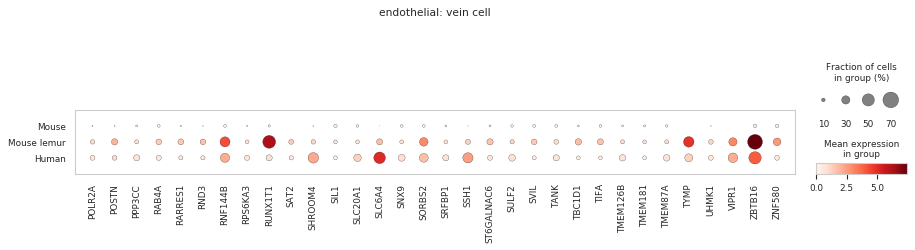

gene subset #4

------- group: endothelial: vein cell -------


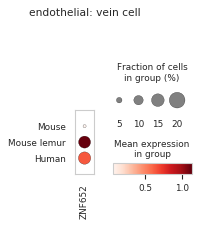

In [41]:
for col_name, col_values in genes_in_primate_enriched_celltypes_binary.iteritems():
    gene_names = col_values[col_values].index
    gene_names = [x for x in gene_names if x not in dissociation_genes]
    col_name_sanitized = xspecies.sanitize(col_name)
    
    compartment_narrow_col = narrow_to_compartment_narrrow[col_name]
    cross_species.dotplots(
        gene_names,
        save=f"__binary__no_dissociation_genes__{col_name_sanitized}",
        select_group=compartment_narrow_col,
        save_format="pdf",
        max_genes=32,
    )

## Dotplolts

In [ ]:
cross_species.species_to_color_map = xspecies.SPECIES_TO_COLOR_MAP
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species-lung/across-species-within-group-diffexpr/ligand_groups'
# ! rm -rf $outdir_gdrive
! mkdir $outdir_gdrive

sc.set_figure_params(
    dpi=200, dpi_save=300, transparent=True, vector_friendly=True, frameon=False
)


for ligand, index in ligand_groups_primate.items():
    print(f'--- {ligand} ---')

    ligands_of_receptors = receptor_ligand_pairs_primate.loc[index]
    
    receptor_subset = sorted(list(ligands_of_receptors[receptor_col].unique()))
    ligand_subset = sorted(list(ligands_of_receptors[ligand_col].unique()))
    gene_subset = ligand_subset + receptor_subset
    print(f'number of overlapping genes: {len(gene_subset)}')
    if not gene_subset:
        continue
    
    save_dir = f'{outdir_gdrive}/ligand-centric/{ligand}/'
    ! mkdir -p $save_dir
    sc.settings.figdir = save_dir
    
    cross_species.dotplot_multispecies(gene_subset, save_prefix=ligand)
